In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikit-multilearn==0.2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 3.9 MB/s eta 0:00:00


In [ ]:
# Data Handling
import os
import re
import string
import numpy as np
import pandas as pd
from numpy import array
from numpy import asarray
from numpy import zeros

# NLP Preprocessing
# import nltk
from tensorflow.keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Machine Learning & Model Evaluation
from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    classification_report, f1_score, precision_score, recall_score,
    confusion_matrix, accuracy_score
)
# from skmultilearn.adapt import MLkNN

# Deep Learning (Keras & TensorFlow)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, LSTM, GRU, SimpleRNN, Dense, Dropout, Activation, Concatenate
)
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.utils import to_categorical

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
d1= pd.read_csv('/content/drive/MyDrive/NLP_Project/NLP/training/train_hi_l1.csv')
d2= pd.read_csv('/content/drive/MyDrive/NLP_Project/NLP/training/train_hi_l2.csv')
d3= pd.read_csv('/content/drive/MyDrive/NLP_Project/NLP/training/train_hi_l3.csv')
d1

,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5
0,भारत में तीन किसान कानून बिल वापस लेने पर भक...,question_1,NaN,NaN,NaN,0.0,NaN
1,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए ...,question_1,NaN,0.0,NaN,NaN,NaN
2,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...,question_1,NaN,NaN,NaN,NaN,0.0
3,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी ...,question_1,NaN,NaN,NaN,0.0,NaN
4,"""PM मोदी जी "" की माँ के लिए अपशब्द कहने वाला द...",question_1,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6192,"😎 काम वाली बाई का फोन आया, पत्नि को। कामवाली ...",question_1,NaN,NaN,NaN,0.0,NaN
6193,😎😎ग्रुप में चर्चा चल रही थी कि 21 दिन के लॉक ड...,question_1,NaN,0.0,NaN,NaN,NaN
6194,🚩 🔱▁▂▄▅▆▇█🦁█▇▆▅▄▂▁🔱 🔱⚜️👉 School में हमें स...,question_1,NaN,NaN,NaN,0.0,NaN
6195,"🚩 #लंका का जिहादी डॉक्टर,हजारों हिंदू महिलाओं ...",question_1,NaN,NaN,NaN,NaN,0.0


The label column is created in the original training dataset by taking the majority occurence of 0 or 1 among all the 6 annotators in columns - 'en_a1',
 'en_a2', 'en_a3', 'en_a4', 'en_a5', 'en_a6'.

## Word Pre-Processing

In [ ]:
# Word Pre-Processing

def normalize_text(text):
  emoji_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F"  # emoticons
                              u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                              u"\U0001F680-\U0001F6FF"  # transport & map symbols
                              u"\U0001F700-\U0001F77F"  # alchemical symbols
                              u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                              u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                              u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                              u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                              u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                              u"\U00002702-\U000027B0"  # Dingbats
                              u"\U000024C2-\U0001F251"
                              "]+", flags=re.UNICODE)
  text = text.lower()
  text = re.sub('\[.*?\]', ' ', text)
  text = re.sub('https?://\S+|www\.\S+', ' ', text)
  text = re.sub('<.*?>+', ' ', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  text = re.sub('\n', ' ', text)
  text = re.sub('\w*\d\w*', ' ', text)
  text = re.sub('<handle replaced>', '', text)
  text = emoji_pattern.sub(r'', text)
  return text

d1['text'] = d1['text'].apply(lambda x: normalize_text(x))
d2['text'] = d2['text'].apply(lambda x: normalize_text(x))
d3['text'] = d3['text'].apply(lambda x: normalize_text(x))


# Train Test Splits

In [ ]:
X1 = list(d1['text'])
X2 = list(d2['text'])
X3 = list(d3['text'])

col_lst = ['hi_a1', 'hi_a2', 'hi_a3', 'hi_a4', 'hi_a5']
for col in col_lst:
    d1[col] = pd.to_numeric(d1[col], errors='coerce')
    d2[col] = pd.to_numeric(d2[col], errors='coerce')
    d3[col] = pd.to_numeric(d3[col], errors='coerce')

d1['label'] = d1[col_lst].max(axis=1, skipna=True).astype(int)  # skipna=True to ignore empty values
d2['label'] = d2[col_lst].max(axis=1, skipna=True).astype(int)  # skipna=True to ignore empty values
d3['label'] = d3[col_lst].max(axis=1, skipna=True).astype(int)  # skipna=True to ignore empty values

d1 = d1.drop(col_lst, axis=1)
d2 = d2.drop(col_lst, axis=1)
d3 = d3.drop(col_lst, axis=1)

d1['label'] = d1['label'].astype(int)
d2['label'] = d2['label'].astype(int)
d3['label'] = d3['label'].astype(int)

d1 = d1[['label', 'text']]
d2 = d2[['label', 'text']]
d3 = d3[['label', 'text']]
d2

,label,text
0,0,भारत में तीन किसान कानून बिल वापस लेने पर भक...
1,1,राजस्थान अजीबोगरीब गांव की खुशहाली के लिए ...
2,0,सलमान ने की राखी के विरोधी की वकालत तो आइटम...
3,0,हर शब्द अमॄतम पुरानी एक कहावत है टूटी ...
4,0,pm मोदी जी की माँ के लिए अपशब्द कहने वाला द...
...,...,...
6186,0,काम वाली बाई का फोन आया पत्नि को। कामवाली ...
6187,1,ग्रुप में चर्चा चल रही थी कि दिन के लॉक डाउन...
6188,0,school में हमें सती प्रथा घूंघट प्रथा ...
6189,1,लंका का जिहादी डॉक्टर हजारों हिंदू महिलाओं क...


In [ ]:
y_data1 = d1["label"]
y_data2 = d2["label"]
y_data3 = d3["label"]
# print(y_data)
y1 = y_data1.values
y2 = y_data2.values
y3 = y_data3.values
print(y1)
print(len(y1))
print(y2)
print(len(y2))
print(y3)
print(len(y3))

[0 0 0 ... 0 0 0]
6197
[0 1 0 ... 0 1 0]
6191
[0 0 0 ... 1 0 0]
6197


# Model CNN & Bi-LSTM

In [ ]:
#Model CNN & Bi-LSTM
######## Textual Features for Embedding ###################
max_len = 100
max_features = 4479
embed_size = 300
tokenizer1 = Tokenizer(num_words=max_features)
tokenizer2 = Tokenizer(num_words=max_features)
tokenizer3 = Tokenizer(num_words=max_features)

tokenizer1.fit_on_texts(list(X1))
tokenizer2.fit_on_texts(list(X2))
tokenizer3.fit_on_texts(list(X3))

word_index3=tokenizer1.word_index
word_index2=tokenizer2.word_index
word_index1=tokenizer3.word_index

X1 = tokenizer1.texts_to_sequences(X1)
X2 = tokenizer2.texts_to_sequences(X2)
X3 = tokenizer3.texts_to_sequences(X3)

X1 = pad_sequences(X1, padding='post', maxlen=max_len)
X2 = pad_sequences(X2, padding='post', maxlen=max_len)
X3 = pad_sequences(X3, padding='post', maxlen=max_len)

In [ ]:
######### Label Encoding for y_train & y_test################
from sklearn.preprocessing import LabelEncoder

label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()
y1 = label_encoder1.fit_transform(y1)
y2 = label_encoder2.fit_transform(y2)
y3 = label_encoder3.fit_transform(y3)
y1
# print(len(y))

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X1

array([[  63,    5,  896, ...,    0,    0,    0],
       [ 629, 1047,    3, ...,    0,    0,    0],
       [1783,   21,    3, ...,    0,    0,    0],
       ...,
       [   5,  357, 3995, ...,    0,    0,    0],
       [   6,  201, 1216, ...,    0,    0,    0],
       [ 205,  205,  688, ...,    0,    0,    0]], dtype=int32)

In [ ]:
print(len(X1))

6197


In [ ]:
y1 = to_categorical(y1, num_classes=2)
y2 = to_categorical(y2, num_classes=2)
y3 = to_categorical(y3, num_classes=2)
y1

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
embeddings_dictionary = dict()


embedding_path = '/content/drive/MyDrive/NLP_Project/NLP/cc.hi.300.vec'

embedding_matrix = np.zeros((len(word_index1) + 1, embed_size))
with open(embedding_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.rstrip().split()
        word = values[0]
        if word in word_index1:
            coefs = np.asarray(values[1:], dtype='float32')
            embedding_matrix[word_index1[word]] = coefs



vocab_size1 = len(tokenizer1.word_index) + 1  ## total distinct words is the Vocabulary ##
word_index = tokenizer1.word_index
num_words = min(max_features,len(word_index)+1)



In [ ]:
embedding_matrix.shape

(4479, 300)

# Model Training

Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.6713 - loss: 0.6375 - precision: 0.6713 - recall: 0.6713 - val_accuracy: 0.7089 - val_loss: 0.6050 - val_precision: 0.7089 - val_recall: 0.7089
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7035 - loss: 0.6043 - precision: 0.7035 - recall: 0.7035 - val_accuracy: 0.7048 - val_loss: 0.5771 - val_precision: 0.7048 - val_recall: 0.7048
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7230 - loss: 0.5751 - precision: 0.7230 - recall: 0.7230 - val_accuracy: 0.7073 - val_loss: 0.6098 - val_precision: 0.7073 - val_recall: 0.7073
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7322 - loss: 0.5698 - precision: 0.7322 - recall: 0.7322 - val_accuracy: 0.7145 - val_loss: 0.5680 - val_precision: 0.7145 - val_recall: 0.7145
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7274 - loss: 0.5500 - precision: 0.7274 - recall: 0.7274 - val_accuracy: 0.7145 - val_lo

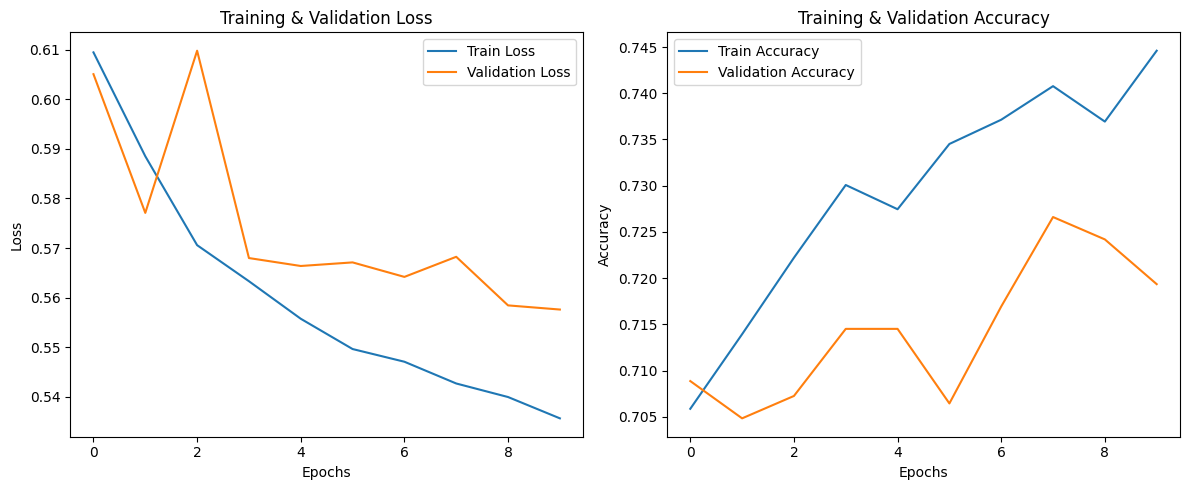

In [ ]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.metrics import Precision, Recall, AUC

X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y1, test_size=0.2, random_state=None)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X2, y2, test_size=0.2, random_state=None)
X_train3, X_val3, y_train3, y_val3 = train_test_split(X3, y3, test_size=0.2, random_state=None)

num_classes = 2
epochs = 10
batch_size = 32


model1 = Sequential([
    Embedding(input_dim=embedding_matrix.shape[0],
              output_dim=embed_size,
              weights=[embedding_matrix],
              trainable=False),  # Freeze embedding layer
    SimpleRNN(256),  # Basic LSTM layer with 64 units
    Dense(1024, activation='relu'),  # Fully connected layer
    Dense(num_classes, activation="softmax")  # Output layer
])




model1.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

history1 = model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=epochs, batch_size=batch_size, verbose=1)

# Evaluate model
y_pred1 = np.argmax(model1.predict(X_val1), axis=1)
y_val_labels1 = np.argmax(y_val1, axis=1)
print(classification_report(y_val_labels1, y_pred1, target_names=["Hate", "Not Hate"]))

# Plot Training & Validation Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:

# Compute F1 score, precision, and recall
f1 = f1_score(y_val_labels1, y_pred1, average='weighted')
precision = precision_score(y_val_labels1, y_pred1, average='weighted')
recall = recall_score(y_val_labels1, y_pred1, average='weighted')

print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

F1 Score: 0.6894029843707088
Precision: 0.6894515092572397
Recall: 0.7193548387096774


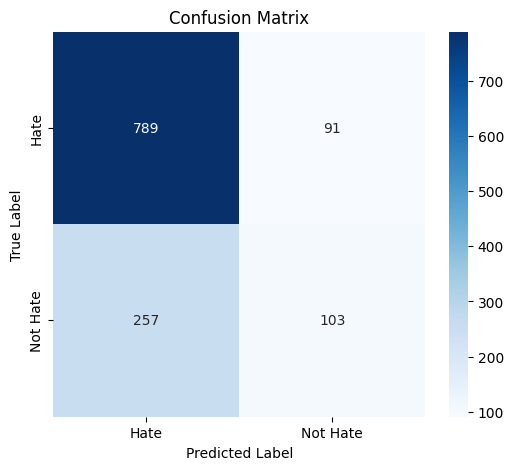

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_val_labels1, y_pred1)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Hate", "Not Hate"], yticklabels=["Hate", "Not Hate"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5365 - loss: 0.6912 - val_accuracy: 0.5811 - val_loss: 0.6800
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5912 - loss: 0.6733 - val_accuracy: 0.5997 - val_loss: 0.6669
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6202 - loss: 0.6547 - val_accuracy: 0.6045 - val_loss: 0.6672
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6469 - loss: 0.6440 - val_accuracy: 0.6077 - val_loss: 0.6616
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6543 - loss: 0.6254 - val_accuracy: 0.6061 - val_loss: 0.6634
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6696 - loss: 0.6174 - val_accuracy: 0.6094 - val_loss: 0.6602
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6691 - loss: 0.6084 - val_accuracy: 0.6069 - val_loss: 0.6672
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6801 - loss: 0.5976 - val_accu

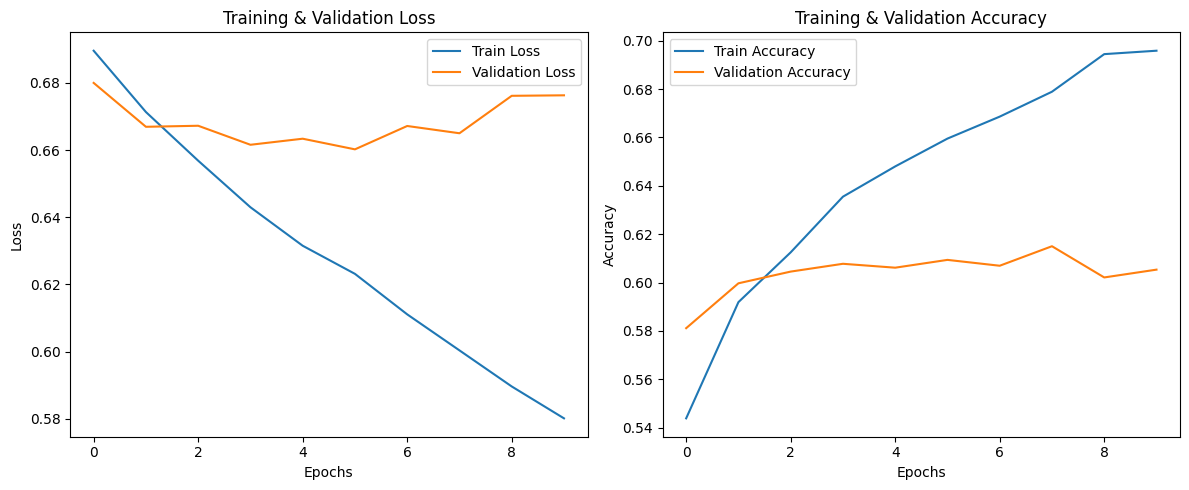

In [ ]:
model2 = Sequential([
    Embedding(input_dim=embedding_matrix.shape[0],
              output_dim=embed_size,
              weights=[embedding_matrix],
              trainable=False),  # Freeze embedding layer
    SimpleRNN(512),  # Basic LSTM layer with 64 units
    Dense(1024, activation='relu'),  # Fully connected layer
    Dense(num_classes, activation="softmax")  # Output layer
])

model2.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])

history2 = model2.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=epochs, batch_size=batch_size, verbose=1)


# Evaluate model
y_pred2 = np.argmax(model2.predict(X_val2), axis=1)
y_val_labels2 = np.argmax(y_val2, axis=1)
print(classification_report(y_val_labels2, y_pred2, target_names=["Hate", "Not Hate"]))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
# Compute F1 score, precision, and recall
f1 = f1_score(y_val_labels2, y_pred2, average='weighted')
precision = precision_score(y_val_labels2, y_pred2, average='weighted')
recall = recall_score(y_val_labels2, y_pred2, average='weighted')

print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

F1 Score: 0.6052980769838273
Precision: 0.6053079237586028
Recall: 0.6053268765133172


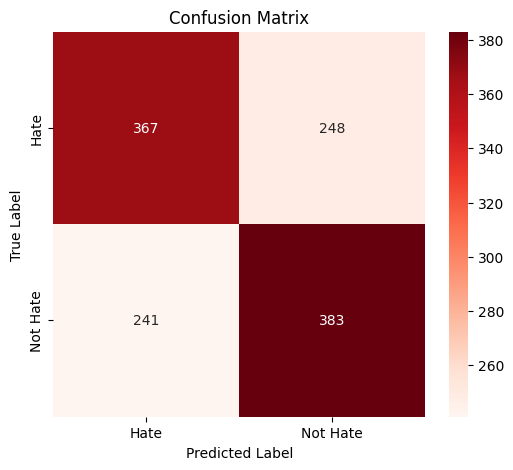

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_val_labels2, y_pred2)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=["Hate", "Not Hate"], yticklabels=["Hate", "Not Hate"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.5578 - loss: 0.6809 - val_accuracy: 0.6210 - val_loss: 0.6394
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.6477 - loss: 0.6290 - val_accuracy: 0.6653 - val_loss: 0.6144
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6734 - loss: 0.6031 - val_accuracy: 0.6613 - val_loss: 0.6202
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6846 - loss: 0.5946 - val_accuracy: 0.6556 - val_loss: 0.6297
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6940 - loss: 0.5827 - val_accuracy: 0.6726 - val_loss: 0.6152
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7138 - loss: 0.5677 - val_accuracy: 0.6694 - val_loss: 0.6184
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7187 - loss: 0.5570 - val_accuracy: 0.6589 - val_loss: 0.6221
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7241 - loss: 0.5492 - val_accu

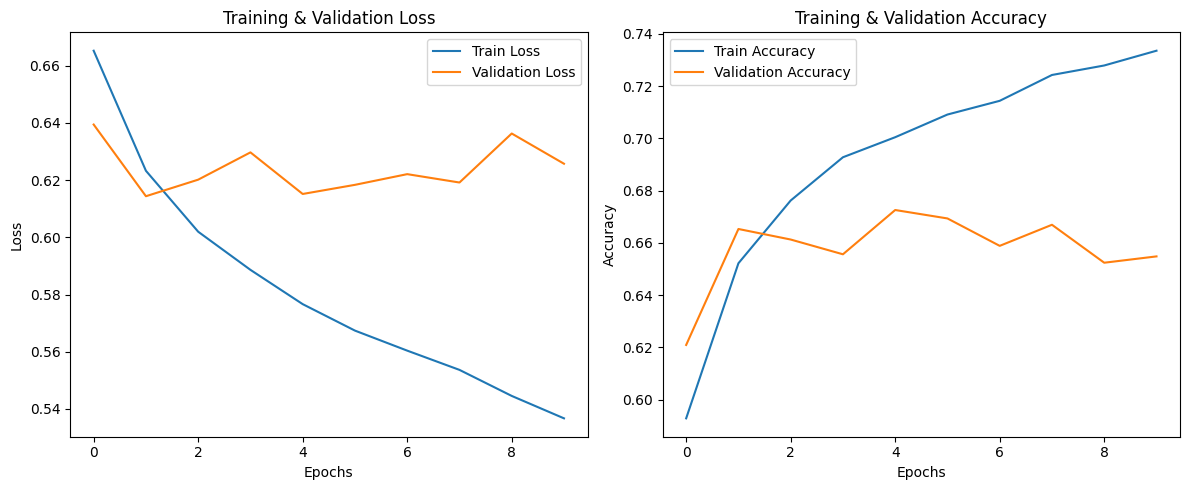

In [ ]:
model3 = Sequential([
    Embedding(input_dim=embedding_matrix.shape[0],
              output_dim=embed_size,
              weights=[embedding_matrix],
              trainable=False),  # Freeze embedding layer
    SimpleRNN(512),  # Basic LSTM layer with 64 units
    Dense(1024, activation='relu'),  # Fully connected layer
    Dense(num_classes, activation="softmax")  # Output layer
])

model3.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])


history3 = model3.fit(X_train3, y_train3, validation_data=(X_val3, y_val3), epochs=epochs, batch_size=batch_size, verbose=1)


# Evaluate model
y_pred3 = np.argmax(model3.predict(X_val3), axis=1)
y_val_labels3 = np.argmax(y_val3, axis=1)
print(classification_report(y_val_labels3, y_pred3, target_names=["Hate", "Not Hate"]))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


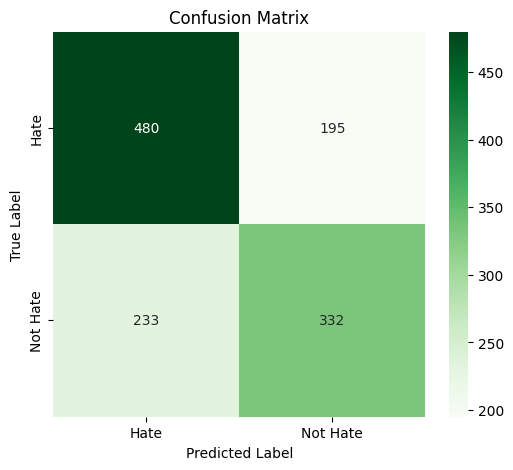

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_val_labels3, y_pred3)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=["Hate", "Not Hate"], yticklabels=["Hate", "Not Hate"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Compute F1 score, precision, and recall
f1 = f1_score(y_val_labels3, y_pred3, average='weighted')
precision = precision_score(y_val_labels3, y_pred3, average='weighted')
recall = recall_score(y_val_labels3, y_pred3, average='weighted')

print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

F1 Score: 0.653557986434253
Precision: 0.6535138961706023
Recall: 0.6548387096774193


In [ ]:
model1.save('/content/drive/MyDrive/NLP_Project/CnnBiLstm_Code_Arxiv/Hindi/SimpleRNN_Hi_1.keras')
model2.save('/content/drive/MyDrive/NLP_Project/CnnBiLstm_Code_Arxiv/Hindi/SimpleRNN_Hi_2.keras')
model3.save('/content/drive/MyDrive/NLP_Project/CnnBiLstm_Code_Arxiv/Hindi/SimpleRNN_Hi_3.keras')

# Testing on Unseen Data

In [ ]:
vv_1= pd.read_csv('/content/drive/MyDrive/NLP_Project/NLP/testing/hindi/test_hi_l1.csv')
vv_2= pd.read_csv('/content/drive/MyDrive/NLP_Project/NLP/testing/hindi/test_hi_l2.csv')
vv_3= pd.read_csv('/content/drive/MyDrive/NLP_Project/NLP/testing/hindi/test_hi_l3.csv')
vv_1


,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5
0,#BandraStation #SharadPawar #Muradabad अगर अभ...,question_1,NaN,0.0,0.0,0.0,NaN
1,#ConspiracyAgainstIndia सुन लो रे देश के गद्द...,question_1,NaN,0.0,0.0,0.0,NaN
2,#MarathaReservation : महाराष्ट्र में जश्न का म...,question_1,0.0,0.0,0.0,NaN,NaN
3,#RheaChakraborty aap Mahesh bhatt se madad kiy...,question_1,NaN,1.0,1.0,0.0,NaN
4,"#SecularMaskOfd हमे पता नहि क्या कहते है ,इतना...",question_1,0.0,NaN,1.0,0.0,NaN
...,...,...,...,...,...,...,...
1512,है हैवान लोग होते हैं इनको ओसामा लादेन खतरनाक ...,question_1,NaN,0.0,NaN,0.0,1.0
1513,"🇮🇳जय हिन्द,🇮🇳जय भारत,🇮🇳वन्दे मातरम🇮🇳🇮🇳 बघेल तु...",question_1,NaN,0.0,NaN,1.0,1.0
1514,🙏जय भीम 🙏 जो लोग हमें धमकियां देते है और संव...,question_1,0.0,NaN,NaN,0.0,0.0
1515,🚩🕉🚩 *इंसान के पास 😇दिमाग होना चाहिये* *💀खोपड़...,question_1,0.0,NaN,0.0,0.0,NaN


In [ ]:
vv1=vv_1
vv2=vv_2
vv3=vv_3

In [ ]:
import keras

In [ ]:
model1 = keras.models.load_model('/content/drive/MyDrive/NLP_Project/CnnBiLstm_Code_Arxiv/Hindi/SimpleRNN_Hi_1.keras')
model2 = keras.models.load_model('/content/drive/MyDrive/NLP_Project/CnnBiLstm_Code_Arxiv/Hindi/SimpleRNN_Hi_2.keras')
model3 = keras.models.load_model('/content/drive/MyDrive/NLP_Project/CnnBiLstm_Code_Arxiv/Hindi/SimpleRNN_Hi_3.keras')


In [ ]:
vv_1['text'] = vv_1['text'].apply(lambda x: normalize_text(x))
vv_2['text'] = vv_2['text'].apply(lambda x: normalize_text(x))
vv_3['text'] = vv_3['text'].apply(lambda x: normalize_text(x))
# vv['text'] = vv['text'].apply(lambda x: normalize_text_2(x))
vv_1 = vv_1[['text']]
vv_2 = vv_2[['text']]
vv_3 = vv_3[['text']]
vv_1.columns = ['text']
vv_2.columns = ['text']
vv_3.columns = ['text']
vv_1

,text
0,bandrastation sharadpawar muradabad अगर अभ...
1,conspiracyagainstindia सुन लो रे देश के गद्द...
2,marathareservation महाराष्ट्र में जश्न का म...
3,rheachakraborty aap mahesh bhatt se madad kiy...
4,secularmaskofd हमे पता नहि क्या कहते है इतना...
...,...
1512,है हैवान लोग होते हैं इनको ओसामा लादेन खतरनाक ...
1513,जय हिन्द जय भारत वन्दे मातरम बघेल तुझसे देश शर...
1514,जय भीम जो लोग हमें धमकियां देते है और संविध...
1515,इंसान के पास दिमाग होना चाहिये खोपड़ी तो ...


In [ ]:
######## Textual Features for Embedding ###################

sequence1 = tokenizer1.texts_to_sequences(vv_1.text)
sequence1 = pad_sequences(sequence1, padding='post', maxlen=max_len)

sequence2 = tokenizer2.texts_to_sequences(vv_2.text)
sequence2 = pad_sequences(sequence2, padding='post', maxlen=max_len)

sequence3 = tokenizer3.texts_to_sequences(vv_3.text)
sequence3 = pad_sequences(sequence3, padding='post', maxlen=max_len)

In [ ]:
sequence1 = tokenizer1.texts_to_sequences(vv_1['text']) # same tokenizer which is used on train data.
sequence1 = pad_sequences(sequence1, padding='post', maxlen = max_len)

sequence2 = tokenizer2.texts_to_sequences(vv_1['text']) # same tokenizer which is used on train data.
sequence2 = pad_sequences(sequence2, padding='post', maxlen = max_len)

sequence3 = tokenizer3.texts_to_sequences(vv_1['text']) # same tokenizer which is used on train data.
sequence3 = pad_sequences(sequence3, padding='post', maxlen = max_len)



In [ ]:
predictions1 = model1.predict(sequence1)
classes1 = np.argmax(predictions1, axis=1)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [ ]:
predictions2 = model2.predict(sequence2)
classes2 = np.argmax(predictions2, axis=1)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [ ]:
predictions3 = model3.predict(sequence3)
classes3 = np.argmax(predictions3, axis=1)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [ ]:
predictions1

array([[0.76036566, 0.23963435],
       [0.42439982, 0.57560015],
       [0.81773245, 0.18226753],
       ...,
       [0.8083043 , 0.19169565],
       [0.6798673 , 0.3201327 ],
       [0.82392573, 0.17607424]], dtype=float32)

In [ ]:
print(len(predictions1))

1517


In [ ]:
# Assign label 0 if the left probability is higher, otherwise label 1
predictions1 = np.argmax(predictions1, axis=1)
predictions2 = np.argmax(predictions2, axis=1)
predictions3 = np.argmax(predictions3, axis=1)
# predictions = 1 - predictions

# Display the resulting array of predictions
print(predictions1)

[0 1 0 ... 0 0 0]


In [ ]:
print(len(predictions1))

1517


In [ ]:
vv1

,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5
0,bandrastation sharadpawar muradabad अगर अभ...,question_1,NaN,0.0,0.0,0.0,NaN
1,conspiracyagainstindia सुन लो रे देश के गद्द...,question_1,NaN,0.0,0.0,0.0,NaN
2,marathareservation महाराष्ट्र में जश्न का म...,question_1,0.0,0.0,0.0,NaN,NaN
3,rheachakraborty aap mahesh bhatt se madad kiy...,question_1,NaN,1.0,1.0,0.0,NaN
4,secularmaskofd हमे पता नहि क्या कहते है इतना...,question_1,0.0,NaN,1.0,0.0,NaN
...,...,...,...,...,...,...,...
1512,है हैवान लोग होते हैं इनको ओसामा लादेन खतरनाक ...,question_1,NaN,0.0,NaN,0.0,1.0
1513,जय हिन्द जय भारत वन्दे मातरम बघेल तुझसे देश शर...,question_1,NaN,0.0,NaN,1.0,1.0
1514,जय भीम जो लोग हमें धमकियां देते है और संविध...,question_1,0.0,NaN,NaN,0.0,0.0
1515,इंसान के पास दिमाग होना चाहिये खोपड़ी तो ...,question_1,0.0,NaN,0.0,0.0,NaN


In [ ]:
# X = list(vv1['text'])
#y = np.asarray(d1[d1.columns[1:]])
col_lst = ['hi_a1', 'hi_a2', 'hi_a3', 'hi_a4', 'hi_a5']
for col in col_lst:
    vv1[col] = pd.to_numeric(vv1[col], errors='coerce')
    vv2[col] = pd.to_numeric(vv2[col], errors='coerce')
    vv3[col] = pd.to_numeric(vv3[col], errors='coerce')


vv1['label'] = vv1[col_lst].max(axis=1, skipna=True)  # skipna=True to ignore empty values
# Replace NaN values with 0 before converting to int
vv1['label'] = vv1['label'].fillna(0).astype(int)

vv2['label'] = vv2[col_lst].max(axis=1, skipna=True)  # skipna=True to ignore empty values
# Replace NaN values with 0 before converting to int
vv2['label'] = vv2['label'].fillna(0).astype(int)

vv3['label'] = vv3[col_lst].max(axis=1, skipna=True)  # skipna=True to ignore empty values
# Replace NaN values with 0 before converting to int
vv3['label'] = vv3['label'].fillna(0).astype(int)

vv1['label'] = vv1['label'].astype(int)
vv2['label'] = vv2['label'].astype(int)
vv3['label'] = vv3['label'].astype(int)

vv1 = vv1[['label', 'text']]
vv2 = vv2[['label', 'text']]
vv3 = vv3[['label', 'text']]
vv1

true_1 = vv1["label"]
true_2 = vv2["label"]
true_3 = vv3["label"]
# print(true_)
y_test_1 = true_1.values
y_test_2 = true_2.values
y_test_3 = true_3.values
print(y_test_1)
print(len(y_test_1))

[0 0 0 ... 0 0 1]
1517


In [ ]:
ids = np.arange(1, len(y_test_1)+1)
result_df_1 = pd.DataFrame({'id': ids, 'prediction': predictions1, 'true': y_test_1})
# result_df_1

ids = np.arange(1, len(y_test_2)+1)
result_df_2 = pd.DataFrame({'id': ids, 'prediction': predictions2, 'true': y_test_2})
# result_df_2

ids = np.arange(1, len(y_test_3)+1)
result_df_3 = pd.DataFrame({'id': ids, 'prediction': predictions3, 'true': y_test_3})
result_df_3

,id,prediction,true
0,1,0,1
1,2,1,1
2,3,0,0
3,4,1,1
4,5,1,1
...,...,...,...
1512,1513,1,1
1513,1514,0,1
1514,1515,1,1
1515,1516,0,1


In [ ]:
def compute_metrics(result_df, color):
    # Compute metrics
    accuracy = accuracy_score(result_df['true'], result_df['prediction'])
    f1 = f1_score(result_df['true'], result_df['prediction'], average='weighted')  # Use 'macro', 'micro', or 'weighted' as needed
    recall = recall_score(result_df['true'], result_df['prediction'], average='weighted')
    precision = precision_score(result_df['true'], result_df['prediction'], average='weighted')
    conf_matrix = confusion_matrix(result_df['true'], result_df['prediction'])

    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    # print("Confusion Matrix:")
    # print(conf_matrix)

    conf_matrix = confusion_matrix(result_df['true'], result_df['prediction'])

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=color, xticklabels=set(result_df['true']), yticklabels=set(result_df['true']))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


Accuracy: 0.6335
F1 Score: 0.5836
Recall: 0.6335
Precision: 0.6841


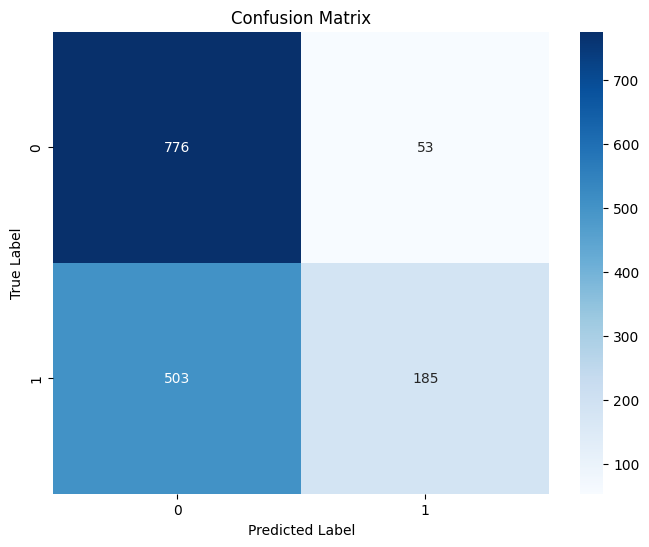

In [ ]:
compute_metrics(result_df_1, "Blues")

Accuracy: 0.5966
F1 Score: 0.6316
Recall: 0.5966
Precision: 0.7616


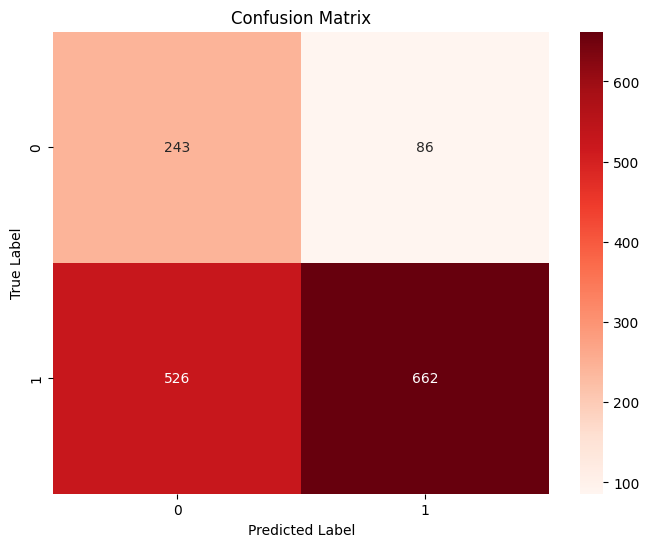

In [ ]:
compute_metrics(result_df_2, "Reds")

Accuracy: 0.6546
F1 Score: 0.6625
Recall: 0.6546
Precision: 0.7588


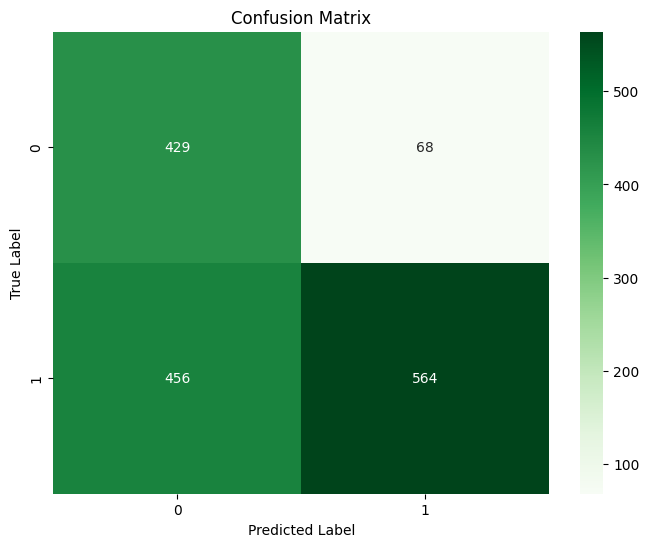

In [ ]:
compute_metrics(result_df_3, "Greens")

In [ ]:
# Save the DataFrame to a CSV file
result_df_1.to_csv('/content/drive/MyDrive/NLP_Project/NLP/Hindi_output/SimpleRNN_output_Hindi_l1.csv', index=False)
result_df_2.to_csv('/content/drive/MyDrive/NLP_Project/NLP/Hindi_output/SimpleRNN_output_Hindi_l2.csv', index=False)
result_df_3.to_csv('/content/drive/MyDrive/NLP_Project/NLP/Hindi_output/SimpleRNN_output_Hindi_l3.csv', index=False)